# 1) How well do different data roles pay?
# 2) Top 10 highest-paid skills for Data Analysts & top 10 most in-demand skills for Data Analysts.

## Steps  
1. **Evaluate median salary for top 6 data jobs**  
2. **Find median salary per skill for Data Analysts**  
3. **Visualize for highest paying skills and most demanded skills**  


### Importing libraries & basic cleaning 

In [76]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # job skills coloumn is converted to list

In [77]:
df_ind = df[(df["job_country"] == "India")].dropna(subset="salary_year_avg") # dropping nan values
df_ind.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
703543,Data Engineer,ETL & DB Engineer,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-03-07 03:59:08,False,False,India,year,64800.0,NaN,Zeta Global,"[sql, nosql, javascript, python, scala, sql se...","{'analyst_tools': ['ssis'], 'async': ['jira'],..."
534075,Senior Data Engineer,Senior Data Engineer,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-22 19:28:05,True,False,India,year,147500.0,NaN,Verisk,"[python, nosql]","{'programming': ['python', 'nosql']}"
705174,Machine Learning Engineer,"Machine Learning Engineer | Hybrid, Bangalore,...","Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-04-06 03:13:26,False,False,India,year,166000.0,NaN,Optiv,"[python, java, keras, pytorch]","{'libraries': ['keras', 'pytorch'], 'programmi..."


In [78]:
job_titles = df_ind["job_title_short"].value_counts().head(6).index.to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [79]:
df_ind_top6 = df_ind[df_ind["job_title_short"].isin(job_titles)]
df_ind_top6.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
525326,Data Scientist,"Associate Director, DS and AI Solutions",India,via Ai-Jobs.net,Full-time,False,India,2023-11-24 11:11:01,False,False,India,year,43200.0,NaN,Bristol Myers Squibb,[excel],{'analyst_tools': ['excel']}
416639,Data Scientist,"Head of Data Science, Analytics and BI",India,via Ai-Jobs.net,Full-time,False,India,2023-06-14 16:11:51,False,False,India,year,166419.5,NaN,Carousell Group,"[python, sql, tensorflow, keras, spark, tablea...","{'analyst_tools': ['tableau', 'looker', 'qlik'..."
622101,Data Engineer,Software Dev Engineer III - Data Engineering,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-08 12:12:00,False,False,India,year,147500.0,NaN,Tesco Bengaluru,"[no-sql, shell, sql, oracle, hadoop, spark, ka...","{'analyst_tools': ['splunk'], 'cloud': ['oracl..."


In [80]:
job_order = df_ind_top6.groupby(["job_title_short"])["salary_year_avg"].median().sort_values(ascending=False).index # so that the graph is in descending order
job_order

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'],
      dtype='object', name='job_title_short')

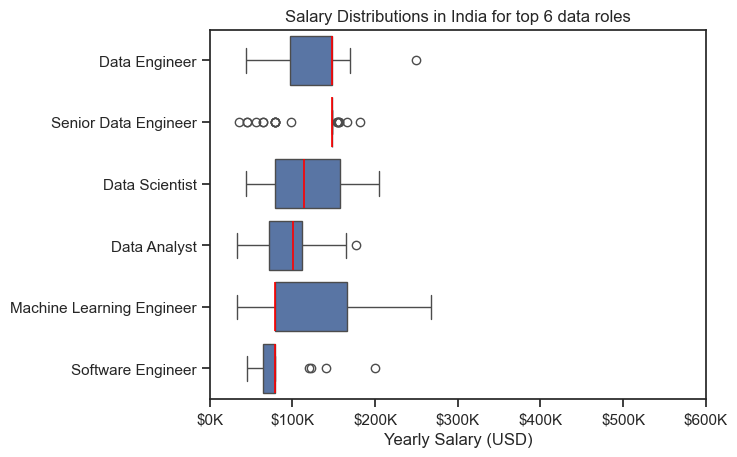

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='ticks')
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', medianprops={"color": "red", "linewidth": 1.2}, order=job_order)

plt.title('Salary Distributions in India for top 6 data roles')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()


# 2) Top 10 highest-paid skills for Data Analysts & top 10 most trending skills for Data Analysts.


In [85]:
df_DA_India = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "India")].copy()
df_DA_India = df_DA_India.dropna(subset="salary_year_avg")
df_DA_India.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
610349,Data Analyst,Manager - Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-04-18 12:13:41,False,False,India,year,111175.0,NaN,Upstox,None,None
728556,Data Analyst,Business Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-12-16 21:07:17,False,False,India,year,54988.0,NaN,NetApp,[tableau],{'analyst_tools': ['tableau']}
708637,Data Analyst,Principal Member Technical Staff (Platform- Da...,"Hyderabad, Telangana, India",via Ai-Jobs.net,Full-time,False,India,2023-01-19 02:13:10,False,False,India,year,79200.0,NaN,Model N,"[java, aws, azure, spring, spark, hadoop, kafk...","{'cloud': ['aws', 'azure'], 'libraries': ['spr..."


In [86]:
df_DA_India = df_DA_India.explode("job_skills")

In [130]:
# df_DA_India_top_pay = df_DA_India.groupby("job_skills")["salary_year_avg"].agg(
#     median = "median",
#     count = "count"
# ).sort_values(by="median", ascending=False) #alternate way

df_DA_India_plot = df_DA_India.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_India_top_pay = df_DA_India_plot.sort_values(by="median", ascending=False).head(10)
df_DA_India_top_trend = df_DA_India_plot.sort_values(by="count", ascending=False).head(10).sort_values(by="median") # first got top 10 counts then arranged the same in descending order of median

df_DA_India_top_pay #top highest paid skills of data analyst in India
df_DA_India_top_trend #top trending skills of data analyst in India


,count,median
job_skills,,
aws,12,79200.0
r,18,79200.0
oracle,11,79200.0
azure,15,93600.0
python,36,96050.0
sql,46,96050.0
excel,39,98500.0
tableau,20,108087.5
power bi,17,111175.0


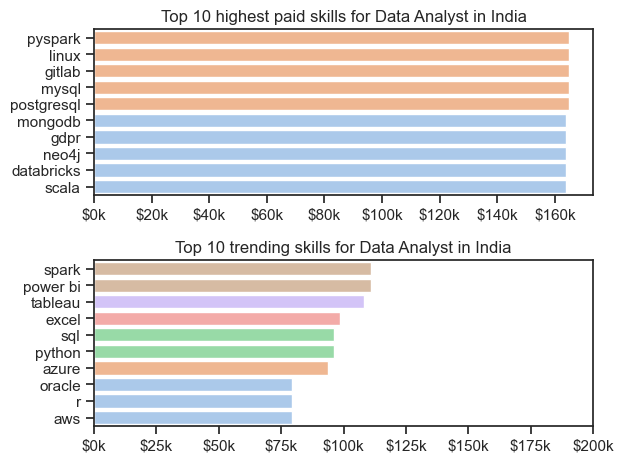

In [141]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")


sns.barplot(data=df_DA_India_top_pay, x="median", y=df_DA_India_top_pay.index, ax=ax[0], hue="median", palette="pastel")
# ax[0].invert_yaxis()
ax[0].set_title("Top 10 highest paid skills for Data Analyst in India")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))



sns.barplot(data=df_DA_India_top_trend, x="median", y=df_DA_India_top_trend.index, ax=ax[1], legend=False, hue="median", palette="pastel") # r for reverse coloring
ax[1].invert_yaxis()
ax[1].set_xlim(0, 200000)
ax[1].set_title("Top 10 trending skills for Data Analyst in India")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
# ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))

plt.tight_layout()